In [ ]:
%%bash

DATASET_PATH=/cs/usr/roi.eliasian/LabFolder/NpcTransportExperiment/HS-AFM-Dataset/
FULL_NPC_GENERATION_PATH=$DATASET_PATH/scripts/npctransport/full_npc/
CONFIGS_PATH=$DATASET_PATH/scripts/npctransport/configs

# Setup conda environment
source /cs/labs/ravehb/roi.eliasian/miniconda3/etc/profile.d/conda.sh
conda activate baraks_for_fast_conda

# Use baraks non-precompiled IMP version
IMP=/cs/labs/ravehb/ravehb/imp/fast_conda/setup_environment.sh

# Generate configuration files
bash $IMP python3 $FULL_NPC_GENERATION_PATH/load_whole_new_coarse_grained_v15.py $DATASET_PATH/temp.pb $FULL_NPC_GENERATION_PATH/47-35_1spoke.rmf3 --params_file $FULL_NPC_GENERATION_PATH/load.params --n_diffusers 0 --n_kap_interaction_sites 8 --diffusers_radii 35 --advanced_include_Nup2 --write_obstacles_voxel_map


In [5]:
import numpy as np

with open("S0.obstacles.txt", "r") as f:
    voxel_map = np.zeros(shape=(80, 80, 80))
    for xy in range(12100):
        line = np.array(f.readline().split())
        x = xy % 110
        y = int((xy - x) / 110)
        if 15 <= x < 95 and 15 <= y < 95:
            voxel_map[x-15,y-15,:] = (line[15:95].astype(int))
    pass

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def visualize_voxels(array3d, alpha=0.3, cmap='viridis', figsize=(10, 10)):
    """
    Visualize a 3D numpy array as voxels using matplotlib.
    
    Parameters:
    -----------
    array3d : numpy.ndarray
        3D numpy array to visualize
    alpha : float, optional
        Transparency of voxels (default: 0.3)
    cmap : str, optional
        Colormap to use for voxels (default: 'viridis')
    figsize : tuple, optional
        Figure size in inches (default: (10, 10))
        
    Returns:
    --------
    fig : matplotlib.figure.Figure
        The figure containing the visualization
    ax : matplotlib.axes.Axes
        The 3D axes object
    """
    # Create figure and 3D axes with space for colorbar
    fig = plt.figure(figsize=figsize)
    gs = fig.add_gridspec(1, 20)  # Create 20 columns
    ax = fig.add_subplot(gs[0, :19], projection='3d')  # Use first 19 columns for plot
    
    # Normalize the data for colormapping
    normalized_data = (array3d - array3d.min()) / (array3d.max() - array3d.min())
    
    # Create a color array of the same shape as the input
    colors = plt.cm.get_cmap(cmap)(normalized_data)
    
    # Create a boolean mask for filled voxels
    filled = array3d != 0
    
    # Plot voxels
    ax.voxels(filled,
              facecolors=colors,
              alpha=alpha,
              edgecolor='k',
              linewidth=0.5)
    
    # Set labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    # Set axis limits
    ax.set_xlim(0, array3d.shape[0])
    ax.set_ylim(0, array3d.shape[1])
    ax.set_zlim(0, array3d.shape[2])
    
    # Add a colorbar
    norm = plt.Normalize(vmin=np.min(array3d), vmax=np.max(array3d))
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    
    # Create colorbar in the last column
    cax = fig.add_subplot(gs[0, 19])
    fig.colorbar(sm, cax=cax)
    
    plt.tight_layout()
    return fig, ax

/tmp/ipykernel_2635841/2151680398.py:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap(cmap)(normalized_data)


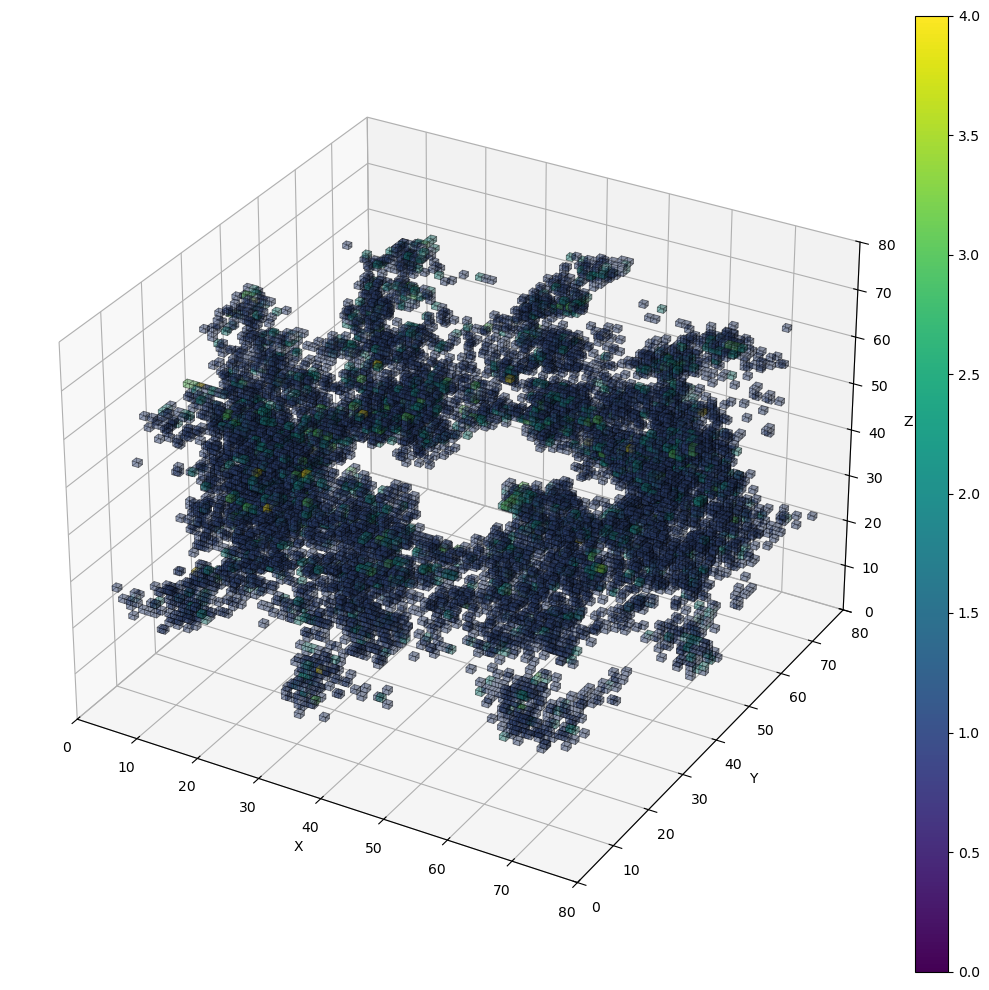

In [17]:
fig, ax = visualize_voxels(voxel_map)
plt.show()

In [9]:
import pickle

with open("scaffold_voxel_map.pickle", "wb") as f:
    pickle.dump(voxel_map, f)